#### Reference: http://brandonrose.org/clustering

In [1]:
first_time = True

In [1]:
import string
#from collections import Counter
import pickle
import joblib

import numpy as np
import pandas as pd
import nltk
import re
import os

from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot as plt

%matplotlib inline 


from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import normalize


from sklearn.cluster import KMeans
from sklearn.manifold import MDS

# Document Dataframe

In [2]:
#ONLY NEED TO RUN ONCE; NO NEED TO RUN AGAIN
#CREATES the csv
import csv

with open('filenames.csv', 'w') as csvfile:
    filenames = csv.writer(csvfile, delimiter = ',')
    filenames.writerow(['document_id','file_name', 'label'])
    rows = []
    num = -1
    for filename in os.listdir('clean_text3'):
        with open(os.path.join('clean_text3', filename), 'r') as f:
            num +=1
            file_name = "clean_text3/" + filename
            pattern = r'([^D]+)'
            match = re.findall(pattern, filename)
            label = match[0].strip("_")
            #print(label)
            row=[num, file_name, label]
            print(row)
            rows.append(row)
    filenames.writerows(rows)

[0, 'clean_text3/_UNK_DEF 14A_20181110_0001213900-18-013745.txt', 'UNK']
[1, 'clean_text3/C_DEF 14A_20190416_0001206774-19-000719.txt', 'C']
[2, 'clean_text3/ARTX_DEF 14A_20190506_0000916529-19-000044.txt', 'ARTX']
[3, 'clean_text3/GGT-R_DEF 14A_20190513_0001133228-19-001870.txt', 'GGT-R']
[4, 'clean_text3/ACU_DEF 14A_20190422_0001193125-19-080802.txt', 'ACU']
[5, 'clean_text3/AHC_DEF 14A_20190509_0001193125-19-089173.txt', 'AHC']
[6, 'clean_text3/ALG_DEF 14A_20181231_0000897077-19-000024.txt', 'ALG']
[7, 'clean_text3/GCP_DEF 14A_20190502_0001193125-19-082189.txt', 'GCP']
[8, 'clean_text3/VCON_DEF 14A_20181120_0000310056-18-000051.txt', 'VCON']
[9, 'clean_text3/_UNK_DEF 14A_20190410_0001193125-19-051445.txt', 'UNK']
[10, 'clean_text3/NWBOW_DEF 14A_20190202_0001174947-19-000010.txt', 'NWBOW']
[11, 'clean_text3/PURE_DEF 14A_20181220_0001493152-18-017747.txt', 'PURE']
[12, 'clean_text3/INO_DEF 14A_20181231_0001055726-19-000021.txt', 'INO']
[13, 'clean_text3/_UNK_DEF 14A_20181119_000114420

[521, 'clean_text3/ATSG_DEF 14A_20181231_0000894081-19-000132.txt', 'ATSG']
[522, 'clean_text3/ATUS-W_DEF 14A_20190430_0001628280-19-003207.txt', 'ATUS-W']
[523, 'clean_text3/_UNK_DEF 14A_20190207_0001133228-18-006588.txt', 'UNK']
[524, 'clean_text3/INDBN_DEF 14A_20181231_0000776901-19-000121.txt', 'IN']
[525, 'clean_text3/LPLA_DEF 14A_20190508_0001193125-19-092823.txt', 'LPLA']
[526, 'clean_text3/BEAT_DEF 14A_20181231_0001574774-19-000031.txt', 'BEAT']
[527, 'clean_text3/AGNCB_DEF 14A_20190418_0001193125-19-067166.txt', 'AGNCB']
[528, 'clean_text3/PFGC_DEF 14A_20181113_0001193125-18-290904.txt', 'PFGC']
[529, 'clean_text3/BFS-A_DEF 14A_20190325_0000907254-19-000012.txt', 'BFS-A']
[530, 'clean_text3/BSET_DEF 14A_20190306_0001437749-19-001791.txt', 'BSET']
[531, 'clean_text3/AMAT_DEF 14A_20190307_0001193125-19-015977.txt', 'AMAT']
[532, 'clean_text3/CBSHP_DEF 14A_20181231_0000022356-19-000016.txt', 'CBSHP']
[533, 'clean_text3/BCLI_DEF 14A_20181129_0001144204-18-053095.txt', 'BCLI']
[534

[913, 'clean_text3/NGVC_DEF 14A_20190306_0001437749-19-001061.txt', 'NGVC']
[914, 'clean_text3/AROW_DEF 14A_20190329_0000717538-19-000101.txt', 'AROW']
[915, 'clean_text3/LAZ_DEF 14A_20190423_0001193125-19-076859.txt', 'LAZ']
[916, 'clean_text3/GADS_DEF 14A_20181129_0001615774-18-011325.txt', 'GA']
[917, 'clean_text3/CPSI_DEF 14A_20190429_0001193125-19-078300.txt', 'CPSI']
[918, 'clean_text3/CTRL_DEF 14A_20190430_0001398344-19-005275.txt', 'CTRL']
[919, 'clean_text3/LQMT_DEF 14A_20181115_0001437749-18-018029.txt', 'LQMT']
[920, 'clean_text3/_UNK_DEF 14A_20181207_0000894189-18-006720.txt', 'UNK']
[921, 'clean_text3/NBL_DEF 14A_20190228_0000072207-19-000039.txt', 'NBL']
[922, 'clean_text3/QUIK_DEF 14A_20190424_0001564590-19-008058.txt', 'QUIK']
[923, 'clean_text3/POST_DEF 14A_20190124_0001530950-18-000283.txt', 'POST']
[924, 'clean_text3/IO_DEF 14A_20181130_0001047469-18-006976.txt', 'IO']
[925, 'clean_text3/HWC_DEF 14A_20190424_0001564590-19-007260.txt', 'HWC']
[926, 'clean_text3/ADNT_D

[1285, 'clean_text3/AGTC_DEF 14A_20181115_0001193125-18-300301.txt', 'AGTC']
[1286, 'clean_text3/ETM_DEF 14A_20190521_0001193125-19-087884.txt', 'ETM']
[1287, 'clean_text3/ADAP_DEF 14A_20190502_0001047469-19-001324.txt', 'A']
[1288, 'clean_text3/GTE_DEF 14A_20190507_0001144204-19-015845.txt', 'GTE']
[1289, 'clean_text3/CSCO_DEF 14A_20181212_0001193125-18-306418.txt', 'CSCO']
[1290, 'clean_text3/_UNK_DEF 14A_20190207_0001133228-18-006584.txt', 'UNK']
[1291, 'clean_text3/ALB_DEF 14A_20190507_0000915913-19-000035.txt', 'ALB']
[1292, 'clean_text3/RBCAA_DEF 14A_20190424_0001558370-19-002093.txt', 'RBCAA']
[1293, 'clean_text3/_UNK_DEF 14A_20190416_0001398344-19-003226.txt', 'UNK']
[1294, 'clean_text3/GPN_DEF 14A_20190425_0001193125-19-072800.txt', 'GPN']
[1295, 'clean_text3/CASS_DEF 14A_20190423_0001174947-19-000323.txt', 'CASS']
[1296, 'clean_text3/ALVW_DEF 14A_20190507_0001193125-19-082686.txt', 'ALVW']
[1297, 'clean_text3/MITT_DEF 14A_20190502_0001514281-19-000032.txt', 'MITT']
[1298, 'cl

[1569, 'clean_text3/_UNK_DEF 14A_20190513_0001174850-19-000014.txt', 'UNK']
[1570, 'clean_text3/ANY_DEF 14A_20171231_0001591956-18-000052.txt', 'ANY']
[1571, 'clean_text3/_UNK_DEF 14A_20181219_0001553350-18-001178.txt', 'UNK']
[1572, 'clean_text3/GLW_DEF 14A_20190502_0001206774-19-000978.txt', 'GLW']
[1573, 'clean_text3/GWB_DEF 14A_20190111_0001613665-19-000003.txt', 'GWB']
[1574, 'clean_text3/BRKS_DEF 14A_20190130_0001140361-18-045164.txt', 'BRKS']
[1575, 'clean_text3/PLBC_DEF 14A_20190515_0001437749-19-006001.txt', 'PLBC']
[1576, 'clean_text3/TLR_DEF 14A_20181022_0000912282-18-000143.txt', 'TLR']
[1577, 'clean_text3/GEOS_DEF 14A_20190206_0001193125-19-001874.txt', 'GEOS']
[1578, 'clean_text3/_UNK_DEF 14A_20190301_0001366744-19-000004.txt', 'UNK']
[1579, 'clean_text3/_UNK_DEF 14A_20181113_0001193125-18-291664.txt', 'UNK']
[1580, 'clean_text3/VAL_DEF 14A_20190520_0000314808-19-000069.txt', 'VAL']
[1581, 'clean_text3/_UNK_DEF 14A_20181113_0001193125-18-291658.txt', 'UNK']
[1582, 'clean_

### Dataframe

In [2]:
documents = pd.read_csv("filenames.csv", index_col = 'document_id')
print(documents.shape)
documents.head()

(1853, 2)


,file_name,label
document_id,,
0,clean_text3/_UNK_DEF 14A_20181110_0001213900-1...,UNK
1,clean_text3/C_DEF 14A_20190416_0001206774-19-0...,C
2,clean_text3/ARTX_DEF 14A_20190506_0000916529-1...,ARTX
3,clean_text3/GGT-R_DEF 14A_20190513_0001133228-...,GGT-R
4,clean_text3/ACU_DEF 14A_20190422_0001193125-19...,ACU


## Stopwords, stemming and tokenizing

In [3]:
#stopwords = nltk.corpus.stopwords.words('english')

In [4]:
#print(stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


## Stemming: process of breaking a word down into its root.

In [3]:
# NO NEED TO RUN!
#load nltk's SnowballStemmer as variabled 'stemmer'
stemmer = SnowballStemmer("english")

In [3]:
#NO NEED TO RUN!
#BR functions
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [3]:
#RUN
#Emily's function
def stem_tokenizer(text):
    porter_stemmer=PorterStemmer()
    return [porter_stemmer.stem(token) for token in word_tokenize(text.lower())]

# remove html entities from docs and
# set everything to lowercase
def my_preprocessor(text):
    if (type(text) is not list):
        text=text.split('\n')
    text=" ".join(text).replace("\n"," ").replace('\u200b', '').replace('\n', '')
    return text

def process_text(filename,stop): #removes stopwords
    porter_stemmer = PorterStemmer()
    file=open(filename)
    lines=file.readlines()
    text=" ".join(lines).replace("\n"," ").replace('\u200b', '').replace('\n', '')
    stem_list=stem_tokenizer(text)
    used_list=[token for token in stem_list if token not in stop_words]
    #used_list.remove('\u200b')
    return used_list

In [4]:
#RUN
#Emily's function

# tokenize the doc and lemmatize its tokens
def my_tokenizer(text):
    porter_stemmer = PorterStemmer()
    punctuation=list(string.punctuation)
    #added_stopwords (DOMAIN SPECIFIC): director, compani, share, stock
    stop0=" ".join(stopwords.words("english")+punctuation) #add more stopwords?
    stop_words=set(stem_tokenizer(stop0))
    stem_list=stem_tokenizer(text)
    used_list=[token for token in stem_list if token not in stop_words]
    return used_list

# create a dataframe from a word matrix
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)


#### Testing on one document

In [37]:
#NO NEED TO RUN!
#Test on one document
f = open(documents['file_name'].loc[0],"r")
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in f:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed) #stemmed
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized) #tokenized
    


# DataFrame with tokenized words

In [6]:
#RUN
#Emily's code
filename=documents["file_name"][10]
punctuation=list(string.punctuation)
stop0=" ".join(stopwords.words('english')+punctuation) #all words to be removed
stop_words=set(stem_tokenizer(stop0))
# stems=process_text(filename,stop_words) #returns totalvocab_stemmed: stemmed words

In [7]:
#RUN
#adds the tokenized words to the CSV file
documents['clean_text']=documents['file_name'].apply(lambda x: process_text(filename, stop_words))
documents['clean_text']

document_id
0       [tabl, content, file, secur, exchangecommiss, ...
1       [tabl, content, file, secur, exchangecommiss, ...
2       [tabl, content, file, secur, exchangecommiss, ...
3       [tabl, content, file, secur, exchangecommiss, ...
4       [tabl, content, file, secur, exchangecommiss, ...
                              ...                        
1848    [tabl, content, file, secur, exchangecommiss, ...
1849    [tabl, content, file, secur, exchangecommiss, ...
1850    [tabl, content, file, secur, exchangecommiss, ...
1851    [tabl, content, file, secur, exchangecommiss, ...
1852    [tabl, content, file, secur, exchangecommiss, ...
Name: clean_text, Length: 1853, dtype: object

In [ ]:
#DOWNLOAD TO CSV



In [15]:
#NO NEED TO RUN
#description: for all words in one txt file
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in text:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)
    

# DataFrame of all words from one file

In [12]:
#NO NEED TO RUN
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print("There are " + str(vocab_frame.shape[0]) + ' items in the data frame.')

There are 20385 items in the data frame.


In [43]:
#NO NEED TO RUN
print(vocab_frame.shape)
vocab_frame

(20385, 1)


,words
tabl,table
of,of
content,contents
schedul,schedule
14a,14a
...,...
chief,chief
execut,executive
offic,officer
end,end


## TF IDF document similarity

#### Unigram

In [8]:
#RUN
#Emily's code
#ngram_range = 1,1
tfidf_vectorizer=TfidfVectorizer(input='filename', preprocessor=my_preprocessor, tokenizer=my_tokenizer)
X_tfidf=tfidf_vectorizer.fit_transform(documents["file_name"])
X_tfidf = normalize(X_tfidf) #explains why we normalize: https://www.quora.com/What-is-the-benefit-of-normalization-in-the-tf-idf-algorithm
tfidf_features = tfidf_vectorizer.get_feature_names()
# create a dataframe from the matrix
wm2df(X_tfidf, tfidf_features)

,,•,▪,●,'',''aggreg,''relat,'000,'12,'13,...,xtampza,,,,,,,,🌑,🌑c
Doc0,0.000000,0.0,0.0,0.0,0.202428,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc1,0.000000,0.0,0.0,0.0,0.083000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc2,0.000000,0.0,0.0,0.0,0.110590,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc3,0.000000,0.0,0.0,0.0,0.064955,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc4,0.000000,0.0,0.0,0.0,0.055179,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Doc1848,0.007101,0.0,0.0,0.0,0.108694,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc1849,0.000000,0.0,0.0,0.0,0.069869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc1850,0.013285,0.0,0.0,0.0,0.083644,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doc1851,0.000000,0.0,0.0,0.0,0.082927,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#RUN
#Convert to DF Unigram
tf_idf_array_1 = X_tfidf.toarray()
uni_df = pd.DataFrame(tf_idf_array_1, columns=tfidf_features)

## Dataframe of Unigram

In [10]:
#RUN
print(uni_df.shape)
uni_df.head()

(1853, 306190)


,,•,▪,●,'',''aggreg,''relat,'000,'12,'13,...,xtampza,,,,,,,,🌑,🌑c
0,0.0,0.0,0.0,0.0,0.202428,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.083000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.110590,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.064955,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.055179,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### KMeans for Unigram

In [11]:
#RUN
#number of clusters can be changed
num_clusters = 10

uni_km = KMeans(n_clusters=num_clusters)

uni_km.fit(X_tfidf)

uni_clusters = uni_km.labels_.tolist() #labels

ValueError: x and y must have same first dimension, but have shapes (18,) and (10,)

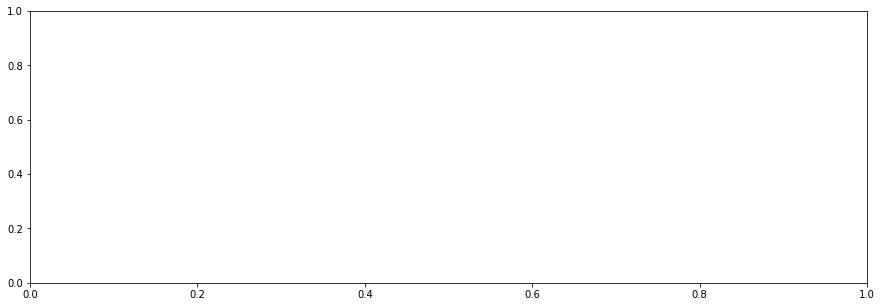

In [16]:
#RUN for Elbow curve
within_cluster_variance = []

for k in range(2, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_tfidf)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid()
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')

plt.title('Elbow curve') 

In [12]:
#RUN
#After Pickling and getting the clusters

joblib.dump(uni_km,  'uni_doc_cluster.pkl') #pickle doc

['uni_doc_cluster.pkl']

In [13]:
#RUN
#Loading the pkl doc

uni_km_load = joblib.load('uni_doc_cluster.pkl')
uni_clusters = uni_km_load.labels_.tolist() #labels

uni_clust_centers = uni_km_load.cluster_centers_ # centers

In [14]:
uni_clusters

[8,
 6,
 3,
 7,
 5,
 2,
 3,
 6,
 5,
 0,
 5,
 5,
 3,
 5,
 6,
 0,
 6,
 6,
 6,
 3,
 4,
 7,
 6,
 6,
 2,
 0,
 1,
 5,
 8,
 6,
 5,
 2,
 6,
 6,
 6,
 5,
 7,
 9,
 5,
 5,
 2,
 2,
 3,
 6,
 3,
 5,
 3,
 5,
 6,
 6,
 6,
 7,
 6,
 3,
 5,
 5,
 6,
 6,
 5,
 7,
 5,
 3,
 5,
 6,
 6,
 7,
 6,
 3,
 6,
 6,
 3,
 6,
 6,
 2,
 8,
 2,
 8,
 6,
 6,
 7,
 6,
 5,
 7,
 2,
 2,
 6,
 6,
 2,
 6,
 5,
 0,
 2,
 6,
 6,
 6,
 6,
 0,
 0,
 3,
 2,
 5,
 0,
 7,
 1,
 3,
 7,
 8,
 6,
 3,
 6,
 2,
 6,
 6,
 6,
 6,
 2,
 3,
 2,
 6,
 7,
 5,
 3,
 6,
 5,
 1,
 3,
 6,
 6,
 5,
 5,
 7,
 6,
 8,
 9,
 3,
 1,
 5,
 6,
 7,
 3,
 6,
 9,
 5,
 5,
 9,
 6,
 5,
 3,
 3,
 3,
 2,
 8,
 5,
 2,
 7,
 0,
 2,
 6,
 7,
 6,
 2,
 5,
 7,
 6,
 6,
 6,
 6,
 5,
 9,
 5,
 5,
 7,
 6,
 3,
 2,
 6,
 7,
 9,
 3,
 3,
 7,
 2,
 1,
 5,
 5,
 3,
 9,
 2,
 6,
 5,
 9,
 6,
 5,
 3,
 8,
 5,
 2,
 5,
 5,
 5,
 3,
 7,
 6,
 7,
 9,
 5,
 9,
 6,
 2,
 5,
 6,
 0,
 0,
 6,
 3,
 6,
 5,
 5,
 6,
 1,
 6,
 9,
 6,
 5,
 1,
 6,
 3,
 5,
 5,
 6,
 3,
 6,
 6,
 9,
 6,
 2,
 6,
 7,
 3,
 6,
 5,
 5,
 6,
 6,
 5,
 2,
 2,
 8,
 6,
 6,


### Top Keywords in Unigram dataframe

In [15]:
#RUN
def get_top_keywords(df, clusters, labels, n_terms): #n_terms: no of words
    #df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.groupby(clusters).mean().iterrows(): #group by cluster means
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(uni_df, uni_clusters, tfidf_features, 10)


Cluster 0
member,sinc,formerli,60606,wacker,board,fund,municip,—,nuveen

Cluster 1
proxi,board,offic,compens,execut,director,begin,end,tabl,—

Cluster 2
∎,share,vote,execut,compani,tabl,compens,committe,board,director

Cluster 3
option,board,director,compens,committe,plan,compani,award,share,stock

Cluster 4
meet,vote,execut,tabl,compens,committe,board,director,compani,--

Cluster 5
execut,annual,compens,proxi,meet,committe,vote,board,compani,director

Cluster 6
annual,share,offic,board,committe,director,tabl,execut,compani,compens

Cluster 7
committe,director,sharehold,invest,truste,meet,board,proxi,vote,fund

Cluster 8
'',compani,meet,proxi,split,common,stockhold,vote,share,stock

Cluster 9
plan,offic,compani,execut,committe,tabl,board,compens,director,


In [ ]:
#possibly 8 clusters
#cluster 6: work, labor
#cluster 0: "risk", finance
#Cluster 1: kind of generic
#

## Unigram Visualization


#### MultiDimensional Scaling

In [27]:
dist = 1 - cosine_similarity(X_tfidf)
dist.shape

(1853, 1853)

In [31]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

Create Colors and Cluster names

In [29]:
#Cluster colors can be increased if adding more than 5 clusters
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#For this dictionary, I just copy pasted the top keywords. See above output.
cluster_names = {0: 'director,compens,tabl,vote,compani,option,plan,stock,award,share', 
                 1: 'meet,advis,vote,proxi,board,truste,sharehold,aberdeen,clarkston,fund', 
                 2: 'bdc,advis,issuer,may,bond,debt,risk,secur,fund,invest', 
                 3: 'annual,share,offic,vote,board,execut,committe,compens,compani,director', 
                 4: 'fee,incom,seri,file,world,america,tax-exempt,bond,american,fund'}

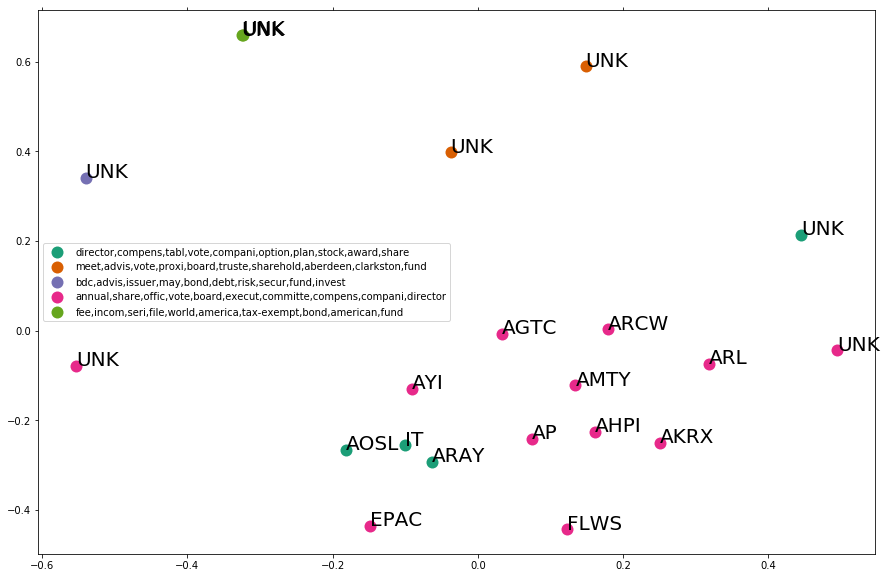

In [152]:
#create data frame that has the result of the MDS plus the cluster numbers
plot_uni_df = pd.DataFrame(dict(x=xs, y=ys, document = documents['label'], label=uni_clusters)) 

groups = plot_uni_df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(15, 10)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the document label
for i in range(len(plot_uni_df)):
     ax.text(plot_uni_df.iloc[i]['x'], plot_uni_df.iloc[i]['y'], 
             plot_uni_df.iloc[i]['document'], size=20)  

    
    
plt.show() #show the plot

### Digram

In [15]:
#ngram_range = 2,2
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(input = "filename",  ngram_range=(2,2), 
                                   tokenizer=my_tokenizer, preprocessor = my_preprocessor)

tfidf_matrix = tfidf_vectorizer.fit_transform(documents['file_name'])
tfidf_matrix = normalize(tfidf_matrix)
tfidf_features_1 = tfidf_vectorizer.get_feature_names()
# create a dataframe from the matrix
wm2df(tfidf_matrix, tfidf_features_1)

, david, end, matthew, propos, tabl, truste,'' '','' **,"'' 1,300,000","'' 1,430,000",...,☐ solicit,☐ three,☐ two,☐ withhold,☐ ☐,☒ definit,☒ end,☒ fee,☒ file,☒ use
Doc0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010488,0.000000,0.000000,0.000000,...,0.001697,0.000000,0.000000,0.000000,0.000000,0.001697,0.000000,0.001592,0.001415,0.000000
Doc1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Doc2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018540,0.000000,0.004752,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.016078,0.000000,0.000000,0.000000,0.000000,0.000000
Doc3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Doc4,0.000000,0.000000,0.000000,0.000000,0.000000,0.003974,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002353,0.002092,0.000000
Doc5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009235,0.000000,0.000000,0.000000,...,0.003487,0.000000,0.000000,0.000000,0.000000,0.003487,0.000000,0.003270,0.002907,0.000000
Doc6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001271,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001201,0.000000
Doc7,0.003654,0.003654,0.003654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.009889,0.000000,0.000000,0.000000,0.000000,0.000000
Doc8,0.000000,0.000000,0.000000,0.006051,0.000000,0.000000,0.000000,0.006051,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Doc9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.015988,0.000000,0.000000,0.000000,0.000000,0.000000


In [93]:
#convert to DF
tf_idf_array = tfidf_matrix.toarray()
new_df = pd.DataFrame(tf_idf_array, columns=tfidf_features_1)

## Dataframe of Digram

In [18]:
new_df.head()

, david, end, matthew, propos, tabl, truste,'' '','' **,"'' 1,300,000","'' 1,430,000",...,☐ solicit,☐ three,☐ two,☐ withhold,☐ ☐,☒ definit,☒ end,☒ fee,☒ file,☒ use
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.010488,0.0,0.000000,0.0,...,0.001697,0.0,0.0,0.0,0.000000,0.001697,0.0,0.001592,0.001415,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.018540,0.0,0.004752,0.0,...,0.000000,0.0,0.0,0.0,0.016078,0.000000,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.003974,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.002353,0.002092,0.0


### K- Means of Digrams

In [20]:
num_clusters = 5

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)



clusters = km.labels_.tolist() #Labels of each point (if compute_labels is set to True).

In [102]:
km_text = km.transform(tfidf_matrix) #transform X to cluster distance space

In [47]:
#NO need to run
#Document Clustering notebook
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

Text(0.5, 1.0, 'Elbow curve')

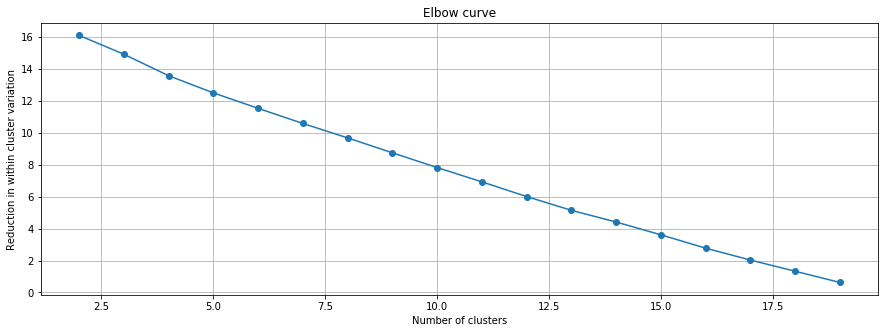

In [25]:
within_cluster_variance = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(tfidf_matrix)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')

plt.title('Elbow curve') 

In [44]:
#After Pickling and getting the clusters
joblib.dump(km,  'doc_cluster.pkl') #pickle doc

km_load = joblib.load('doc_cluster.pkl')
clusters = km_load.labels_.tolist() #labels

clust_centers = km_load.cluster_centers_ # centers

### Get Top 5 Keywords in Digram Dataframe

In [153]:
get_top_keywords(new_df, clusters, tfidf_features_1, 5)


Cluster 0
begin tabl,fiscal 2018,common share,execut offic,— —

Cluster 1
seri american,fund america,bond fund,fund american,american fund

Cluster 2
common stock,audit committe,execut offic,annual meet,board director

Cluster 3
underli fund,board truste,fund invest,servic commenc,advisori agreement

Cluster 4
option exchang,list rule,disregard vote,compani disregard,asx list


## Digram Visualization

#### Multidimensional Scaling

In [154]:
dist_2 = 1 - cosine_similarity(tfidf_matrix)
dist_2.shape

(21, 21)

In [157]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos_2 = mds.fit_transform(dist_2)  # shape (n_components, n_samples)

xs, ys = pos_2[:, 0], pos_2[:, 1]

Create Cluster Colors and Names

In [158]:
cluster_colors_2 = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

cluster_names_2 = {0: 'begin tabl,fiscal 2018,common share,execut offic,— —', 
                 1: 'seri american,fund america,bond fund,fund american,american fund', 
                 2: 'common stock,audit committe,execut offic,annual meet,board director', 
                 3: 'underli fund,board truste,fund invest,servic commenc,advisori agreement', 
                 4: 'option exchang,list rule,disregard vote,compani disregard,asx list'}

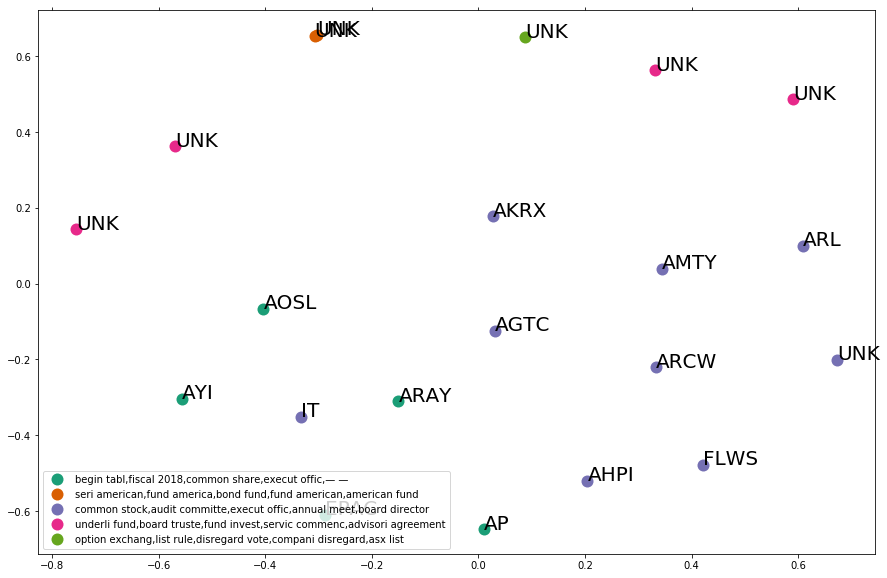

In [159]:
#create data frame that has the result of the MDS plus the cluster numbers
plot_di_df = pd.DataFrame(dict(x=xs, y=ys, document = documents['label'], label=clusters)) 

groups = plot_di_df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(15, 10)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names_2[name], color=cluster_colors_2[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  


for i in range(len(plot_di_df)):
     ax.text(plot_di_df.iloc[i]['x'], plot_di_df.iloc[i]['y'], 
             plot_di_df.iloc[i]['document'], size=20)  

    
    
plt.show()

## Hierarchical Clustering

In [32]:
documents['label']

document_id
0         UNK
1           C
2        ARTX
3       GGT-R
4         ACU
        ...  
1848     SRAX
1849       CE
1850     BPFH
1851      PJT
1852      HFC
Name: label, Length: 1853, dtype: object

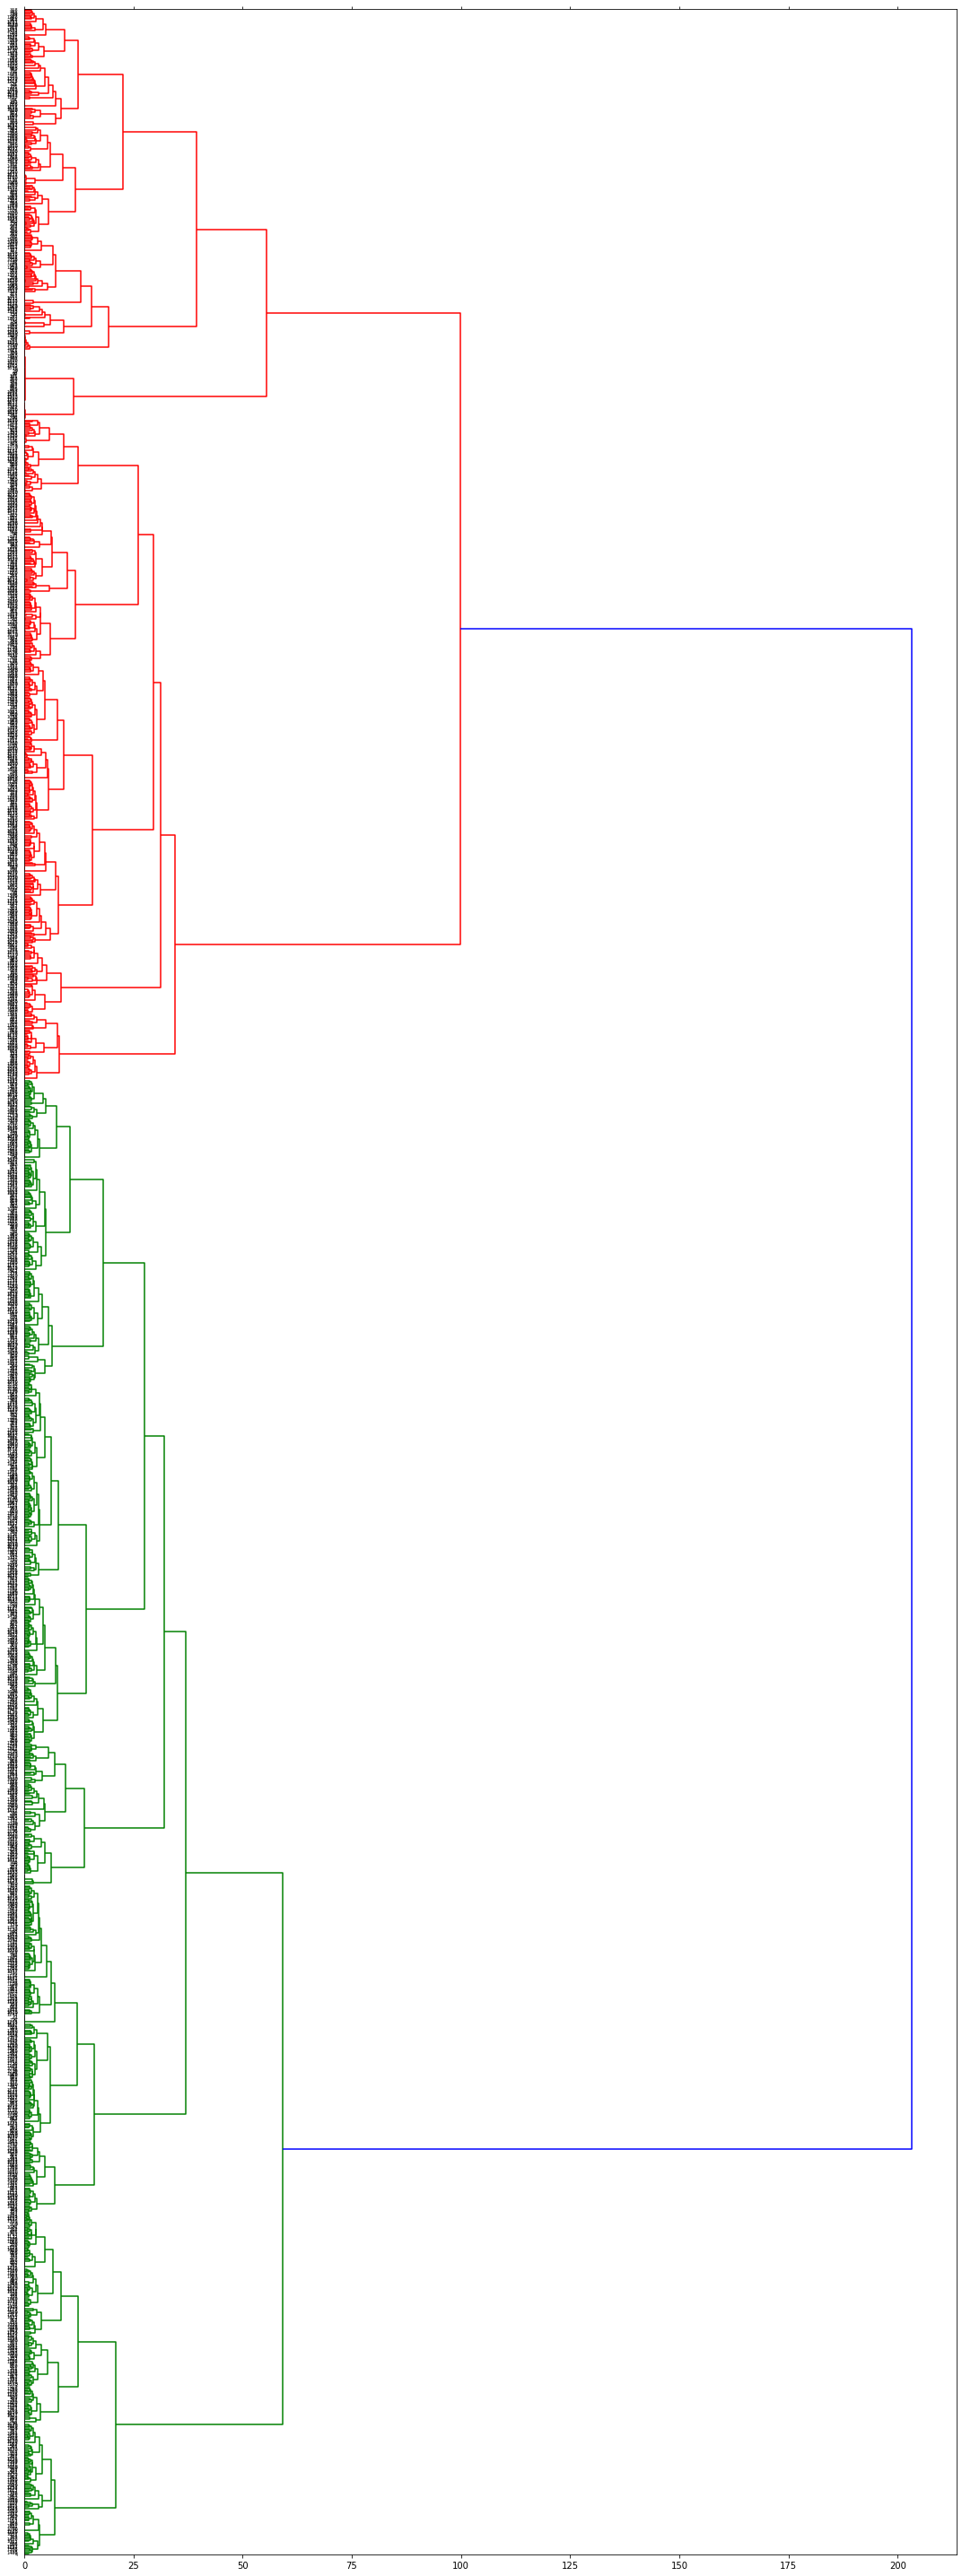

In [45]:
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 40)) # set size
ax = dendrogram(linkage_matrix, orientation="right"); #labels=documents['label']

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

In [50]:
uni_df #1853 documents

,,•,▪,●,'',''aggreg,''relat,'000,'12,'13,...,xtampza,,,,,,,,🌑,🌑c
0,0.000000,0.0,0.0,0.0,0.202428,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.083000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.110590,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.064955,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.055179,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,0.007101,0.0,0.0,0.0,0.108694,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1849,0.000000,0.0,0.0,0.0,0.069869,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1850,0.013285,0.0,0.0,0.0,0.083644,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1851,0.000000,0.0,0.0,0.0,0.082927,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
